In [1]:
# Import sys, then tell python where to find the nEXO-specific classes
import sys
sys.path.append('/Users/sangiorgio1/SoftwareRepositories/sensitivity/modules')

In [15]:
# Import useful libraries for analysis

import pandas as pd
import hist
from hist import Hist
import numpy as np
from matplotlib import pyplot as plt
import os
from pathlib import Path 

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (10,8)

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

In [3]:
# Import the nEXO sensitivity classes

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood

In [10]:
outputdir = Path('/Users/sangiorgio1/scratch/21_11_24/')
filename = Path('sens_output_file_multivarstudy_1.0000x_90CL_001_D024.h5')
df = pd.read_hdf(outputdir/filename)


In [11]:
df.head()

,num_signal,lambda,fixed_fit_converged,fixed_fit_acc_covar,90CL_crossing,num_iterations,best_fit_converged,best_fit_covar,best_fit_iterations,best_fit_parameters,best_fit_errors,best_fit_nll,fixed_fit_parameters,fixed_fit_errors,input_parameters
0,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[-9.427919442472898e-06, 0.7637512434857703, 1...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",4.480448,"[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, ...",True,True,2,"{'Num_Far': 5880.219493458902, 'Num_Vessel_U23...","{447.0377261894987: 447.0377261894987, 1045.89...",-4.145641,"{'Num_Far': 5883.22327420278, 'Num_Vessel_U238...","{416.0695982756961: 416.0695982756961, 1596.71...","[5320.123204785061, 995.0406482092784, 719.074..."
1,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[-9.65937673065298e-05, 0.15030125914516823, 0...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",8.430843,"[1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, ...",True,True,1,"{'Num_Far': 4905.107082327902, 'Num_Vessel_U23...","{1585.3487973519507: 1585.3487973519507, 7356....",-4.583710,"{'Num_Far': 4909.617698808087, 'Num_Vessel_U23...","{468.1460373880541: 468.1460373880541, 1298.03...","[4705.991576771266, 3274.4390874058627, 285.57..."
2,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[-7.075699810421554e-05, 1.291381483193458, 2....","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",2.860286,"[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, ...",True,True,1,"{'Num_Far': 3732.1613731509874, 'Num_Vessel_U2...","{445.64468682940515: 445.64468682940515, 723.3...",-8.742176,"{'Num_Far': 3732.799060404417, 'Num_Vessel_U23...","{518.195558380057: 518.195558380057, 726.71698...","[4804.931644315876, 666.3880737459614, 335.027..."
3,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[0.008187341438846474, 0.05900683106498583, 0....","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",8.630863,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, ...",True,True,2,"{'Num_Far': 4975.35408708711, 'Num_Vessel_U238...","{599.4952731690842: 599.4952731690842, 475.629...",-5.653156,"{'Num_Far': 4916.6133723241255, 'Num_Vessel_U2...","{563.8193871293688: 563.8193871293688, 476.830...","[3992.6873438453968, 1866.1240252639946, 1215...."
4,"[1e-06, 1.4000009999999998, 2.800001, 4.200000...","[-1.6495508602609732e-05, 0.22983967957275897,...","[True, True, True, True, True, True, True, Tru...","[True, True, True, True, True, True, True, Tru...",7.890789,"[1.0, 3.0, 4.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, ...",True,True,2,"{'Num_Far': 3624.3409607445396, 'Num_Vessel_U2...","{522.4899304917058: 522.4899304917058, 11905.0...",-0.632750,"{'Num_Far': 3598.4746132151145, 'Num_Vessel_U2...","{497.79186912176556: 497.79186912176556, 1672....","[4147.027019327185, 1227.507837458484, 243.682..."


In [13]:
print("Number of Toys:", len(df))

Number of Toys: 10


In [14]:
# Compute the convergence fraction
good_fit_mask = []
for index,row in df.iterrows():
    if np.sum(row['fixed_fit_acc_covar']) < len(row['fixed_fit_acc_covar'])-2 \
        or not row['best_fit_covar'] \
        or row['90CL_crossing'] < 0.01\
        or row['best_fit_nll'] > 0.:
        good_fit_mask.append(False)
    else:
        good_fit_mask.append(True)
print(f'Convergence fraction: {np.sum(good_fit_mask)/len(df):3.3}')


Convergence fraction: 1.0


In [18]:
def ComputeHalflifeFromNumCounts( counts ):
    '''Returns the half life which would give (on average) the input number of signal counts'''
    
    N_A = 6.02e23 # atoms/mol
    FidMass = 3281 # kg
    AtomicMass = 135.8 # g/mol
    EnrichmentFraction = 0.9
    SigEfficiency = 0.96
    Livetime = 10 # years
    return FidMass*1.e3 / AtomicMass * N_A * EnrichmentFraction * Livetime * \
            SigEfficiency * np.log(2) / counts


Median 90%CL on signal counts: 7.195719571957197
Sensitivity: 1.21e+28 years


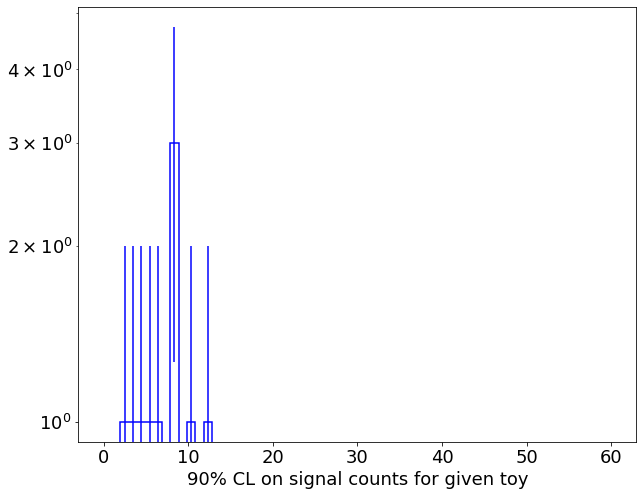

In [20]:
h = Hist.new.Regular(61, 0, 60, name="signal_counts").Double()
h.fill(df['90CL_crossing'].loc[good_fit_mask])
median = np.median(df['90CL_crossing'].loc[good_fit_mask])
print(f'Median 90%CL on signal counts: {median}')
print(f'Sensitivity: {ComputeHalflifeFromNumCounts(median):.2e} years')

fig, ax = plt.subplots()
h.plot1d(ax=ax)
plt.xlabel('90% CL on signal counts for given toy')
plt.yscale('log')